# 2D Plotting with Matplotlib
## Milestone 3: Plot the Year-wise Mean Data Values

### Seoul Bikes DataSet
| column number | column name | data type | units/values |
|----|---------------------------|--------|-----|
| 0  | Date                      | date   |  |
| 1  | Rented Bike Count         | int    |   | 
| 2  | Hour                      | int    | 0-23  | 
| 3  | Temperature(°C)           | float   | °C |  
| 4  | Humidity(%)               | int    | %  |  
| 5  | Wind speed (m/s)          | float  | m/s |  
| 6  | Visibility (10m)          | int   | 10m  |  
| 7  | Dew point temperature(°C) | float |  degree Celsius  | 
| 8  | Solar Radiation (MJ/m2)   |  float| | MJ/m2 |
| 9  | Rainfall(mm)              | float   |  millimetre |megajoule per square metre |
| 10 | Snowfall (cm)             | float      | cm |
| 11 | Seasons                   | string|  Autumn, Spring, Winter, Summer |
| 12 | Holiday                   | string |     No Holiday, Holiday |
| 13 | Functioning Day           | string|  Yes, No |
| 14 | Year                      | int|  2017, 2018|

### 1. Set up the environment by importing the required libraries and selecting the Matplotlib inline Backend

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### 2. Read the dataset into a pandas DataFrame.

In [3]:
data_dir = "./data/"
img_dir = "./img/"

In [4]:
bikes = pd.read_csv(data_dir + "SeoulBikeData.csv",  
                    encoding = 'unicode_escape',   
                    parse_dates=['Date'],
                    date_format = "%d/%m/%Y"  
                  )

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
# check the unique values of the Holida column
bikes.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [7]:
# Take a sample of the columns Date, Hour, Rented Bike Count, Temperature, Wind speed, and Rain
bikes[["Date","Hour","Rented Bike Count","Temperature(°C)","Wind speed (m/s)", "Rainfall(mm)"]].sample(10)

,Date,Hour,Rented Bike Count,Temperature(°C),Wind speed (m/s),Rainfall(mm)
3053,2018-04-07,5,57,1.6,4.9,0.0
8510,2018-11-20,14,790,12.3,2.5,0.0
4565,2018-06-09,5,262,19.0,0.4,0.0
7044,2018-09-20,12,180,19.0,1.7,0.5
5929,2018-08-05,1,758,27.7,2.7,0.0
8257,2018-11-10,1,679,11.2,1.1,0.0
7035,2018-09-20,3,294,19.6,1.7,0.0
3767,2018-05-06,23,1016,15.9,0.6,0.0
104,2017-12-05,8,812,-8.1,1.6,0.0
5041,2018-06-29,1,460,22.0,0.1,0.1


### 3. Add a new column for “Year” to the DataFrame.


In [8]:
from datetime import datetime

In [9]:
a_date = pd.Timestamp(year=2020, month=1, day=2, hour=8) 
a_date

Timestamp('2020-01-02 08:00:00')

In [10]:
bikes.Date[0].year

2017

In [11]:
# create a new column with the Year
bikes["Year"] = bikes.Date.dt.year

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [13]:
bikes.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year
1946,2018-02-20,115,2,-0.8,76,0.8,421,-4.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2018
1783,2018-02-13,294,7,-7.2,70,1.9,1946,-11.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2018
5900,2018-08-03,1517,20,32.2,58,1.9,1673,22.8,0.02,0.0,0.0,Summer,No Holiday,Yes,2018
7215,2018-09-27,1404,15,23.4,35,1.4,2000,7.0,1.39,0.0,0.0,Autumn,No Holiday,Yes,2018
4456,2018-06-04,1671,16,25.5,43,3.2,1892,11.9,1.72,0.0,0.0,Summer,No Holiday,Yes,2018
756,2018-01-01,225,12,1.5,20,2.8,1992,-19.0,1.03,0.0,0.0,Winter,Holiday,Yes,2018
3016,2018-04-05,31,16,8.1,96,1.5,281,7.4,0.21,1.0,0.0,Spring,No Holiday,Yes,2018
7678,2018-10-16,1425,22,13.6,71,0.6,1457,8.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018
4628,2018-06-11,1280,20,19.1,84,1.7,2000,16.3,0.04,0.0,0.0,Summer,No Holiday,Yes,2018
5865,2018-08-02,813,9,32.9,49,1.8,1843,20.7,1.53,0.0,0.0,Summer,No Holiday,Yes,2018


## First Plot

### 4. Group your data by Year and compute the mean using the groupby() function.


### 5. Extract the columns Rented Bike Count, Temperature, Wind Speed, and Rainfall from the DataFrame.

In [14]:
# create new DataFrame with the columns Rented Bike Count, Temperature, Wind Speed, and Rainfall
bikes_weather = bikes[["Year","Rented Bike Count","Temperature(°C)","Wind speed (m/s)", "Rainfall(mm)"]]

In [15]:
bikes_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               8760 non-null   int32  
 1   Rented Bike Count  8760 non-null   int64  
 2   Temperature(°C)    8760 non-null   float64
 3   Wind speed (m/s)   8760 non-null   float64
 4   Rainfall(mm)       8760 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 308.1 KB


In [16]:
# Create a new DataFrame with the yearly mean values of the weather variables
bikes_mean = bikes_weather.groupby("Year").mean()
bikes_mean

,Rented Bike Count,Temperature(°C),Wind speed (m/s),Rainfall(mm)
Year,,,,
2017,249.099462,-1.928763,1.737769,0.046774
2018,746.879242,14.257660,1.723715,0.158146


#### Compute the log of the yearly average of the number of bikes

In [17]:
bikes_mean["Rented Bike Count (log)"] = np.log(bikes_mean["Rented Bike Count"])
bikes_mean

,Rented Bike Count,Temperature(°C),Wind speed (m/s),Rainfall(mm),Rented Bike Count (log)
Year,,,,,
2017,249.099462,-1.928763,1.737769,0.046774,5.517852
2018,746.879242,14.257660,1.723715,0.158146,6.615904


In [18]:
# drop the column Rented Bike Count
bikes_mean.drop(columns = "Rented Bike Count", inplace = True)
bikes_mean

,Temperature(°C),Wind speed (m/s),Rainfall(mm),Rented Bike Count (log)
Year,,,,
2017,-1.928763,1.737769,0.046774,5.517852
2018,14.257660,1.723715,0.158146,6.615904


### 6. Adjust the precision of floating point values in your data.

In [19]:
bikes_mean = bikes_mean.round(2)
bikes_mean

,Temperature(°C),Wind speed (m/s),Rainfall(mm),Rented Bike Count (log)
Year,,,,
2017,-1.93,1.74,0.05,5.52
2018,14.26,1.72,0.16,6.62


### 7. For a grouped bar plot:
- Compute the values of location for each bar on the x-axis.
- Compute the width of bars for your bar plot.
- The number of ticks on the x-axis should be equal to the number of groups in data—unique years in our data. (There are two groups in this case, one each for the years 2017 and 2018.)
- Each tick should be placed at the approximate middle of each group of bars. We have two years in the data — 2017 and 2018.

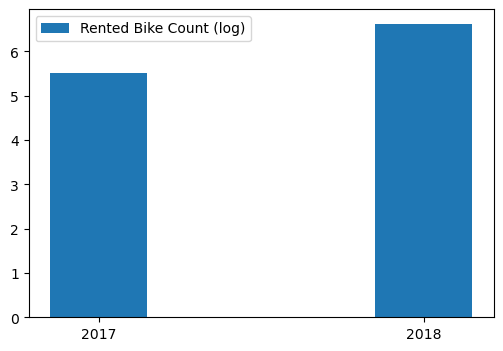

In [20]:
# What happens with only one weather variable?
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x = ['2017','2018'] , height = bikes_mean["Rented Bike Count (log)"], 
       width = 0.3, label="Rented Bike Count (log)")
ax.legend()
plt.show()

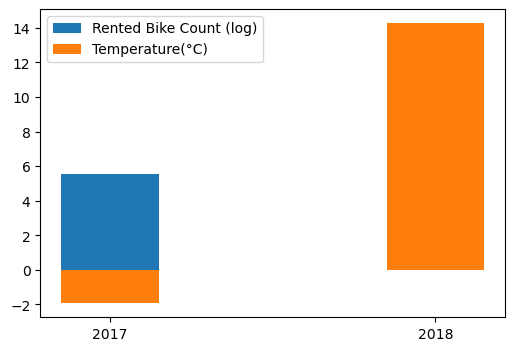

In [21]:
# What happens with two weather variables?
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x = ['2017','2018'] , height = bikes_mean["Rented Bike Count (log)"], width = 0.3, label="Rented Bike Count (log)")  
ax.bar(x = ['2017','2018'] , height = bikes_mean["Temperature(°C)"], width = 0.3, label="Temperature(°C)")  
ax.legend()
plt.show()

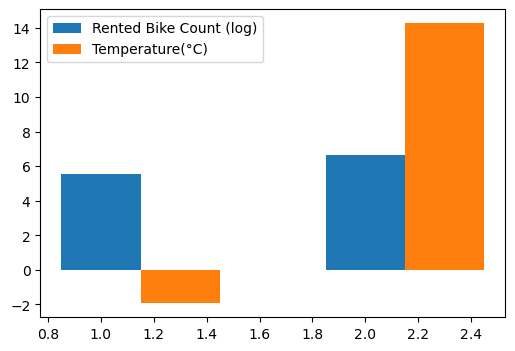

In [22]:
# Two-weather variables revised
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x = [1,2] , height = bikes_mean["Rented Bike Count (log)"], width = 0.3, label="Rented Bike Count (log)")  
ax.bar(x = [1.3,2.3] , height = bikes_mean["Temperature(°C)"], width = 0.3, label="Temperature(°C)")  
ax.legend()
plt.show()

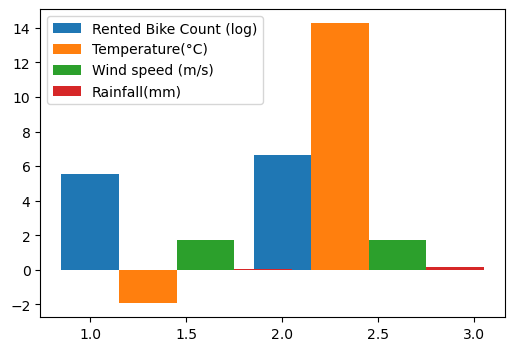

In [23]:
# Four weather variables - Superposition!!!
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x = [1,2] , height = bikes_mean["Rented Bike Count (log)"], width = 0.3, label="Rented Bike Count (log)")  
ax.bar(x = [1.3,2.3] , height = bikes_mean["Temperature(°C)"], width = 0.3, label="Temperature(°C)")  
ax.bar(x = [1.6,2.6] , height = bikes_mean["Wind speed (m/s)"], width = 0.3, label="Wind speed (m/s)")  
ax.bar(x = [1.9,2.9] , height = bikes_mean["Rainfall(mm)"], width = 0.3, label="Rainfall(mm)")  
ax.legend()
plt.show()

### 8. Create the Figure and Axes objects and plot one bar for each column of data on the Axes.
- Use ax.bar() for each column of data and assign its return value to a variable of type BarContainer.
- BarContainer in Matplotlib is a container object for the artists of bar plots created by ax.bar() function. Artist objects are used by matplotlib to draw/render your plots on the figure area or canvas using the Renderer objects. Renderer objects know how to draw a plot on the figure area/canvas. The container can be treated as a tuple of the patches. You can access these patches and their properties for customization of your plot.

### 9. Specify the x position of each bar using the values calculated in Step 8.

Vary the position on the x-axis for each bar to avoid overlap.

#### Heuristic to choose the width of the bars
width = (1.0 - (No. of groups) *margin) / No. of bars in each group     
margin is a small numerical value 

In [24]:
margin = 0.2

In [25]:
num_groups = 2

In [26]:
num_bars = 4

In [27]:
width = (1.0 - num_groups * margin) / num_bars
width

0.15

In [28]:
years = ['2017','2018']

#### Initial positions of each year

In [29]:
group_ini_pos = np.arange(len(years))
group_ini_pos

array([0, 1])

#### Array to store the positions of the bars

In [30]:
bar_positions = np.zeros(shape = (num_bars,num_groups))
bar_positions

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [31]:
for n_bar in np.arange(num_bars):
    bar_positions[n_bar] = group_ini_pos + margin + n_bar * width
bar_positions

array([[0.2 , 1.2 ],
       [0.35, 1.35],
       [0.5 , 1.5 ],
       [0.65, 1.65]])

In [32]:
bikes_mean.columns

Index(['Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)',
       'Rented Bike Count (log)'],
      dtype='object')

#### Plot version 1

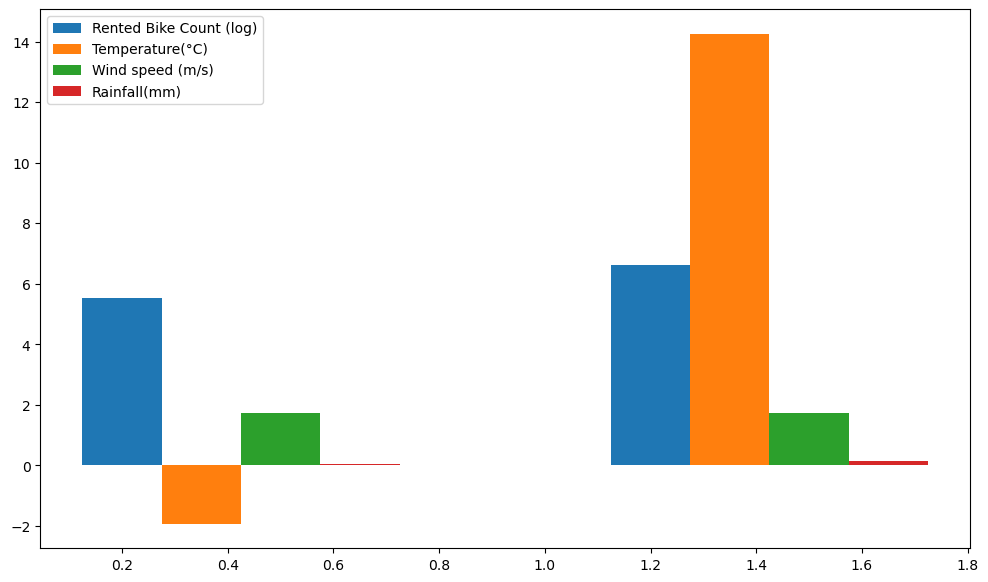

In [33]:
measure_names = ['Rented Bike Count (log)', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)']
fig, ax = plt.subplots(figsize = (12,7))
for i in np.arange(len(measure_names)):
    current_measure = measure_names[i]
    rec_list = ax.bar(bar_positions[i] , bikes_mean[current_measure], width, label=current_measure)  
ax.legend()
plt.show()

#### Plot version 2
- Add values to the bars

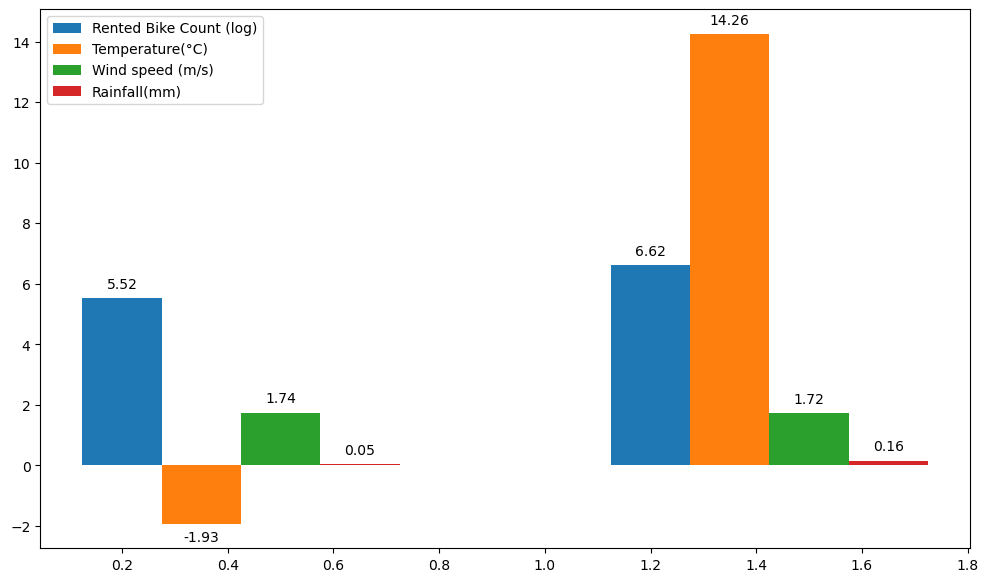

In [34]:
measure_names = ['Rented Bike Count (log)', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)']
fig, ax = plt.subplots(figsize = (12,7))
for i in np.arange(len(measure_names)):
    current_measure = measure_names[i]
    rec_list = ax.bar(bar_positions[i] , bikes_mean[current_measure], width, label=current_measure)  
    ax.bar_label(container = rec_list, padding = 5)
ax.legend()
plt.show()

#### Plot version 3
- Compute the position of the ticks for the x-labels
- Add x_ticks
- Add x_label
- Add y_label
- Add a title

In [35]:
bikes_mean.min(axis=None)

-1.93

### 10. Set the number of ticks, tick labels, and positions for the plot axis.
- The set_major_locator() and set_major_formatter() functions help with formatting of ticks on the x-axis.
- You can use the ticker module FixedFormatter() to specify the fixed positions of ticks.

In [36]:
bar_positions

array([[0.2 , 1.2 ],
       [0.35, 1.35],
       [0.5 , 1.5 ],
       [0.65, 1.65]])

In [37]:
xticks = bar_positions[0]+((bar_positions[3]-bar_positions[0])/2)
xticks

array([0.425, 1.425])

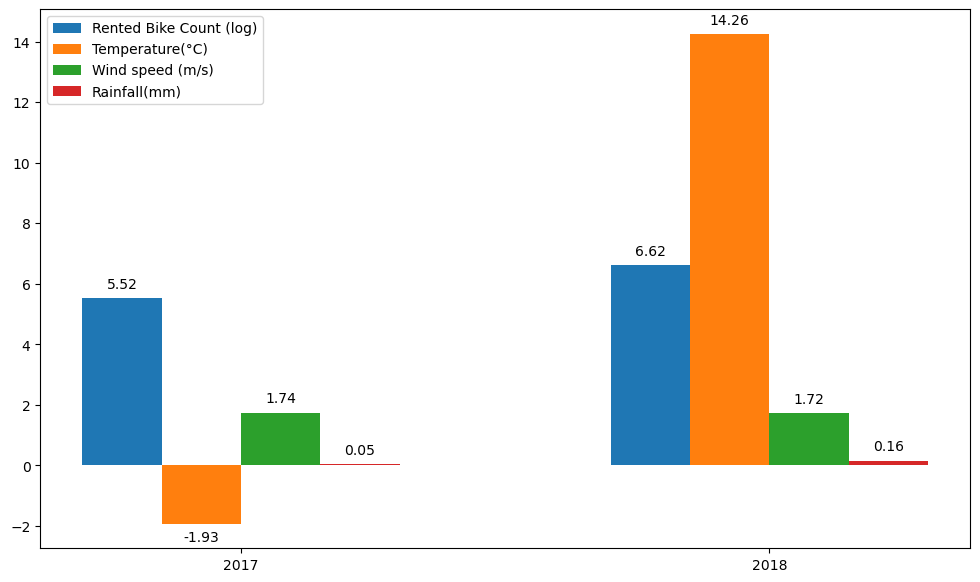

In [38]:
measure_names = ['Rented Bike Count (log)', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)']
fig, ax = plt.subplots(figsize = (12,7))
for i in np.arange(len(measure_names)):
    current_measure = measure_names[i]
    rec_list = ax.bar(bar_positions[i] , bikes_mean[current_measure], width, label=current_measure)  
    ax.bar_label(container = rec_list,
                 padding = 5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(years)
ax.legend()    
plt.show()

### 11. Set the labels of both axes and title of the overall plot.

### 12. Create a plot legend.

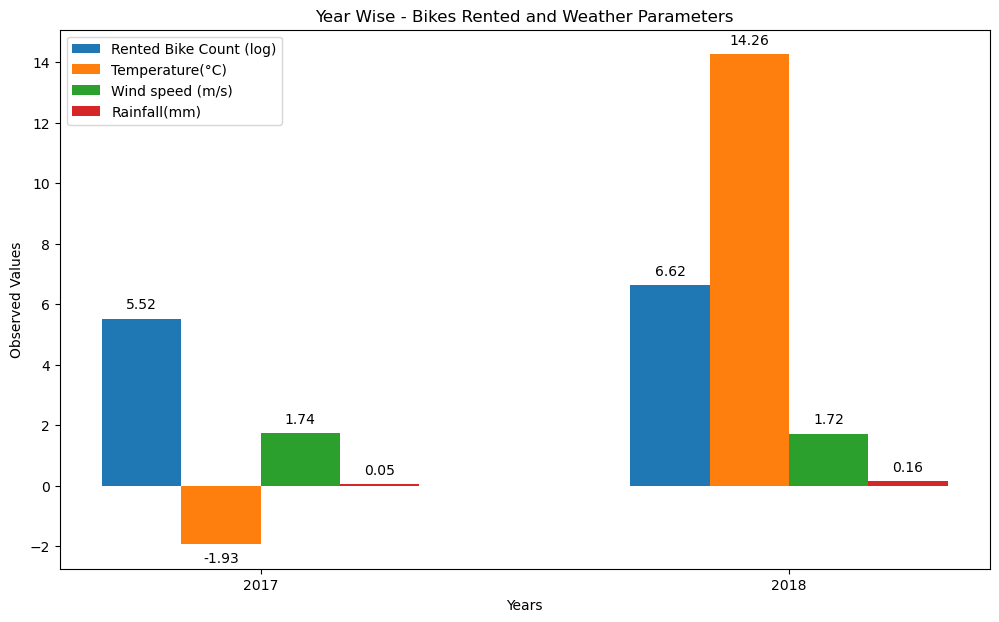

In [39]:
measure_names = ['Rented Bike Count (log)', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)']
fig, ax = plt.subplots(figsize = (12,7))
for i in np.arange(len(measure_names)):
    current_measure = measure_names[i]
    rec_list = ax.bar(bar_positions[i] , bikes_mean[current_measure], width, label=current_measure)  
    ax.bar_label(container = rec_list,
                 padding = 5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(years)
    ax.set_xlabel('Years')
    ax.set_ylabel('Observed Values')
    ax.set_title('Year Wise - Bikes Rented and Weather Parameters')
ax.legend()
plt.show()

### Additional Formatting
- give some space on the y-axis

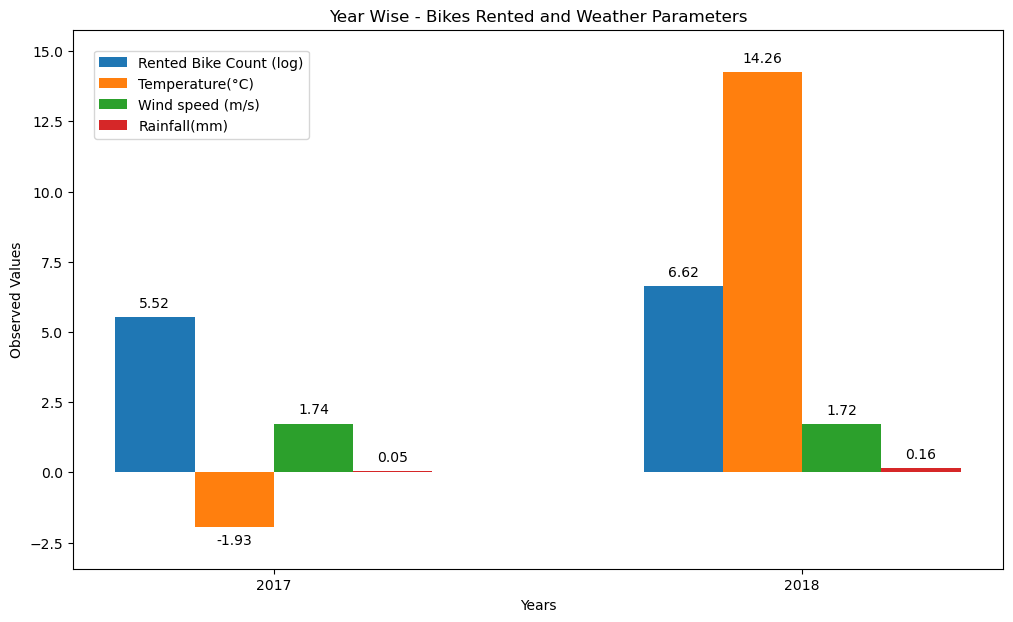

In [40]:
measure_names = ['Rented Bike Count (log)', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)']
y_limits = [bikes_mean.min(axis=None) - 1.5, bikes_mean.max(axis=None) + 1.5]
fig, ax = plt.subplots(figsize = (12,7))
for i in np.arange(len(measure_names)):
    current_measure = measure_names[i]
    rec_list = ax.bar(bar_positions[i] , bikes_mean[current_measure], width, label=current_measure)  
    ax.bar_label(container = rec_list, padding = 5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(years)
    ax.set_ylim(y_limits)
    ax.set_ylabel('Observed Values')
    ax.set_xlabel('Years')
    ax.set_title('Year Wise - Bikes Rented and Weather Parameters')
ax.legend(borderaxespad = 1.5)
plt.show()

### 13. Save your first plot as a png file.

In [41]:
fig.savefig(img_dir+"Year_Wise_Bikes_Weather.png" , dpi = 400)

## Second Plot
The next plot contains 3 subplots of different graph types—stem plot, fill_between plot, and box plot.

### 15. Group your original DataFrame created in Step 2 based on Hour.
- Apply mean() to the groups and save this as a new DataFrame data_hourwise_mean
- Extract the columns Rented Bike Count, Visibility (10m), and Solar Radiation (MJ/m2) into three variables—bikes, visibility, and solar.

In [42]:
data_hourwise_mean = bikes[["Hour","Rented Bike Count","Visibility (10m)","Solar Radiation (MJ/m2)"]].groupby("Hour").mean()
data_hourwise_mean

,Rented Bike Count,Visibility (10m),Solar Radiation (MJ/m2)
Hour,,,
0,541.460274,1433.380822,0.000000
1,426.183562,1414.813699,0.000000
2,301.630137,1382.597260,0.000000
3,203.331507,1358.635616,0.000000
4,132.591781,1339.284932,0.000000
5,139.082192,1333.758904,0.000000
6,287.564384,1311.698630,0.006384
7,606.005479,1298.706849,0.093973
8,1015.701370,1319.523288,0.354959


In [43]:
data_hourwise_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        24 non-null     float64
 1   Visibility (10m)         24 non-null     float64
 2   Solar Radiation (MJ/m2)  24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes


### 16. From this newly created DataFrame:
- Use the round() function to round the values in these three variables to 2 decimal places.
- Create a variable ‘hours’ to store a list of numerical values from 0 to 23.

In [44]:
data_hourwise_mean = data_hourwise_mean.round(2)
data_hourwise_mean

,Rented Bike Count,Visibility (10m),Solar Radiation (MJ/m2)
Hour,,,
0,541.46,1433.38,0.00
1,426.18,1414.81,0.00
2,301.63,1382.60,0.00
3,203.33,1358.64,0.00
4,132.59,1339.28,0.00
5,139.08,1333.76,0.00
6,287.56,1311.70,0.01
7,606.01,1298.71,0.09
8,1015.70,1319.52,0.35


In [45]:
data_hourwise_mean.sample(5)

,Rented Bike Count,Visibility (10m),Solar Radiation (MJ/m2)
Hour,,,
15,829.19,1539.67,1.56
1,426.18,1414.81,0.00
13,733.25,1492.03,1.90
4,132.59,1339.28,0.00
8,1015.70,1319.52,0.35


In [46]:
hours = list(range(24))

### 17. We will use the GridSpec class of Matplotlib to create a grid of subplots in a Figure object. For this:
- Import the gridspec class from matplotlib.gridspec module. This class enables you to specify the position of your subplots. 
- Create a figure object with figsize=15x12, and a GridSpec object of size 2x3. A grid of 2x3 will have  2 rows and 3 columns and will be able to house a maximum of 6 subplots.


### 18. Add the first subplot, a stem plot, to the grid.
- This subplot should occupy row 0 and span to columns 0 and 1 only. 
- This plot is a stem plot showing mean visibility on the x-axis and mean number of bikes rented on the y-axis.
- Add axis labels and plot title.
- Add x-axis and y-axis labels and title to this subplot. 


### Nr. of Rented Bikes by Hour

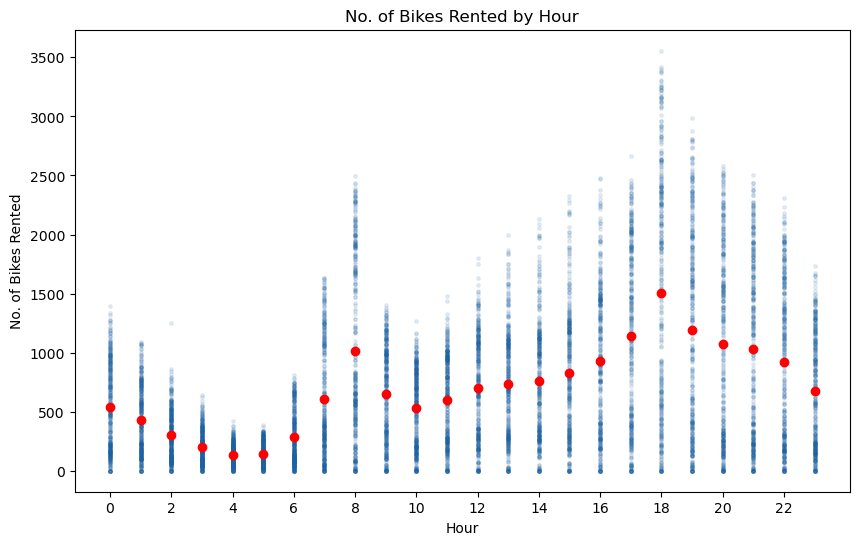

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
cont = ax.plot(bikes["Hour"], bikes["Rented Bike Count"], marker = 'o', markersize = 2.5, linestyle = '', alpha = 0.1, color = "#1B62A5")
ax.plot(data_hourwise_mean.index, data_hourwise_mean["Rented Bike Count"], color = "red", marker = 'o', linestyle = "")
ax.set_title("No. of Bikes Rented by Hour")
ax.set_xticks(range(0,24,2))
ax.set_xlabel("Hour")
ax.set_ylabel("No. of Bikes Rented")
fig.savefig(img_dir+"Nr_of_Rented_Bikes_by_Hour.png" , dpi = 400)
plt.show()

### Nr. of Rented Bikes by Hour

#### **1. Plot Overview**

This figure is a **scatter plot with an overlay of average values**.

* The **blue points** show the raw data: every single observation of bikes rented at each hour.
* The **red points** summarize the average number of rentals at each hour across the dataset.

So, this visualization helps answer:

* *“How does bike rental demand change over the hours of the day?”*
* *“What’s the general daily pattern, and how much **variability** is there within each hour?”*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize = (10,6))
```

* Creates a figure (`fig`) and an axis (`ax`) for plotting.
* `figsize=(10,6)` sets the size in inches — wide enough to fit 24 hourly points clearly.

```python
cont = ax.plot(bikes["Hour"], bikes["Rented Bike Count"], 
               marker='o', markersize=2.5, linestyle='', 
               alpha=0.1, color="#1B62A5")
```

* Plots the **raw rental data** as very small, semi-transparent blue dots.
* `marker='o'` → circles.
* `markersize=2.5` → keeps them small so thousands of points don’t clutter the plot.
* `linestyle=''` → no connecting lines, just points.
* `alpha=0.1` → 10% opacity, so overlapping points don’t overpower the chart.
* `color="#1B62A5"` → a dark blue, chosen for clarity.

```python
ax.plot(data_hourwise_mean.index, data_hourwise_mean["Rented Bike Count"], 
        color="red", marker='o', linestyle="")
```

* Adds the **red average points** for each hour.
* Same markers, but no transparency — they stand out as summary values.

```python
ax.set_title("No. of Bikes Rented by Hour")
ax.set_xticks(range(0,24,2))
ax.set_xlabel("Hour")
ax.set_ylabel("No. of Bikes Rented")
```

* Adds a clear title and axis labels.
* `set_xticks(range(0,24,2))` → shows ticks every 2 hours on the x-axis for readability.

```python
fig.savefig(img_dir+"Nr_of_Rented_Bikes_by_Hour.png", dpi=400)
plt.show()
```

* Saves the figure at high resolution (`dpi=400`) — great for reports.
* Displays the plot.

---

#### **3. Visual Elements Analysis: Answer the following questions**

Here are some : Answer these Questions to answer while looking at the plot:

1. What do you notice about the **x-axis** — how are the hours spaced and labeled?
2. How would you describe the **difference in color** between the blue and red points? Why do you think that choice was made?
3. Do you see any **gridlines** or legends here? Would they help or clutter the chart?
4. How does the **opacity (alpha)** of the blue points affect how readable the chart is?

---

#### **4. Data Interpretation: Answer the following questions**

1. Looking at the red dots, what times of day seem to have the highest average bike rentals?
2. What’s happening in the early morning hours (say, between midnight and 6 a.m.)?
3. Do you notice any patterns around commuting times (morning and evening rush hours)?
4. The blue points are more spread out at certain hours — what does that tell you about variability in rentals?

---

#### **5. Learning Points**

* **Key Matplotlib concepts:**

  * Layering plots (`ax.plot` twice to show raw data + summary).
  * Using transparency (`alpha`) to handle dense scatter plots.
  * Customizing axes ticks, labels, and figure size.
* **When to use this plot type:**

  * When you want to show both the **raw variability** and the **average trend**.
* **Common mistakes students make:**

  * Forgetting `alpha` → the scatter looks like a solid block of ink. Just try it!
  * Not labeling axes → the viewer has no idea what the numbers mean.
* **One suggestion for improvement:**

  * Add a **legend** explaining blue = raw rentals, red = hourly average. That way, even someone brand-new to the dataset understands immediately.

### Stem Plot of Mean Nr. of Rented Bikes by Hour

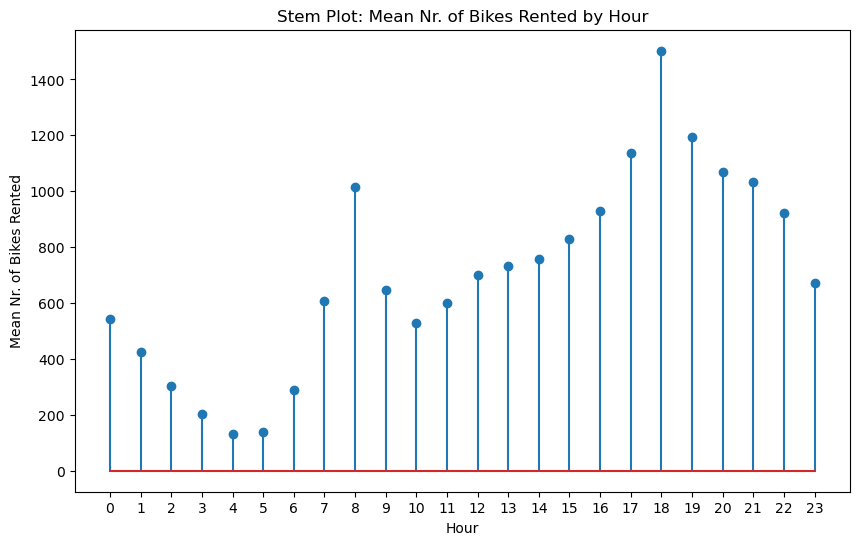

In [48]:
fig, ax = plt.subplots(figsize = (10,6))
ax.stem(data_hourwise_mean.index, data_hourwise_mean["Rented Bike Count"])
ax.set_title("Stem Plot: Mean Nr. of Bikes Rented by Hour")
ax.set_xticks(data_hourwise_mean.index)
ax.set_xlabel("Hour")
ax.set_ylabel("Mean Nr. of Bikes Rented")
fig.savefig(img_dir+"Stem_Plot_of_Mean_Bikes_Rented_by_Hour.png" , dpi = 400)
plt.show()

### Stem Plot of Mean Nr. of Bikes Rented by Hour
#### **1. Plot Overview**

* This is a **stem plot**, sometimes called a “lollipop plot.” Each hour is shown on the x-axis, and the “stick” grows upward to a dot that represents the average number of bikes rented at that hour.
* It’s designed to show **discrete hourly values** in a simple, uncluttered way.
* This plot helps answer questions like:

  * *At what times of day are the most bikes rented on average?*
  * *How does average bike rental demand change across the day?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize = (10,6))
```

* Creates a figure (`fig`) and an axis (`ax`) for plotting.
* `figsize=(10,6)` makes the chart wide and readable.

```python
ax.stem(data_hourwise_mean.index, data_hourwise_mean["Rented Bike Count"])
```

* Creates the **stem plot**.
* `data_hourwise_mean.index` → the x-values (hours of the day).
* `data_hourwise_mean["Rented Bike Count"]` → the y-values (average bikes rented).

```python
ax.set_title("Stem Plot: Mean no. of Bikes Rented by Hour")
```

* Adds a descriptive title at the top.

```python
ax.set_xticks(data_hourwise_mean.index)
```

* Ensures that **every hour (0–23)** is labeled on the x-axis.

```python
ax.set_xlabel("Hour")
ax.set_ylabel("Mean no. of Bikes Rented")
```

* Labels the axes clearly so the viewer knows what’s being measured.

```python
fig.savefig(img_dir+"Stem_Plot_of_Mean_Rented_Bikes_by_Hour.png" , dpi = 400)
plt.show()
```

* Saves the figure as a high-resolution PNG file.
* `dpi=400` → sharp image, suitable for reports or printing.
* `plt.show()` → displays the plot.

---

#### **3. Visual Elements Analysis (for you to think about)**

* What do you notice about how the **x-axis** is labeled? Do you see all 24 hours clearly?
* How would you describe the **colors** used here (blue stems, red baseline)? Do they make it easy to follow the data?
---

#### **4. Data Interpretation (your turn to analyze!)**

* Looking at the stems, which **hours show the highest average rentals**?
* What happens during the early morning hours (say 0–5)? How would you describe demand there?
* Around which hours do you see **peaks** that might match commuting times?
* Do you think this stem plot communicates the **pattern of rentals across the day effectively**? Why or why not?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Creating a stem plot with `ax.stem()`.
  * Customizing axis ticks, labels, and titles.
  * Saving high-resolution figures with `fig.savefig()`.

* **When to use a stem plot:**

  * When you have **discrete categories** (like hours, days, or product IDs).
  * When you want to emphasize exact values without clutter.

* **Common mistakes students make:**

  * Forgetting to label axes, leaving the viewer unsure what’s being measured.
  * Using stem plots with **too many categories** (hundreds), which makes them unreadable.

* **One suggestion for improvement:**

  * Add **annotations** for the peak hour (e.g., “Max rentals at 18:00”), or even overlay a smoother line to show the overall daily trend more clearly.

In [49]:
bikes[bikes.Hour == 18][["Rented Bike Count"]].describe()

,Rented Bike Count
count,365.000000
mean,1502.926027
std,1029.301642
min,0.000000
25%,531.000000
50%,1548.000000
75%,2359.000000
max,3556.000000


In [50]:
data_hourwise_mean["Rented Bike Count"]

Hour
0      541.46
1      426.18
2      301.63
3      203.33
4      132.59
5      139.08
6      287.56
7      606.01
8     1015.70
9      645.98
10     527.82
11     600.85
12     699.44
13     733.25
14     758.82
15     829.19
16     930.62
17    1138.51
18    1502.93
19    1195.15
20    1068.96
21    1031.45
22     922.80
23     671.13
Name: Rented Bike Count, dtype: float64

### Box Plot of Rented Bikes by Hour

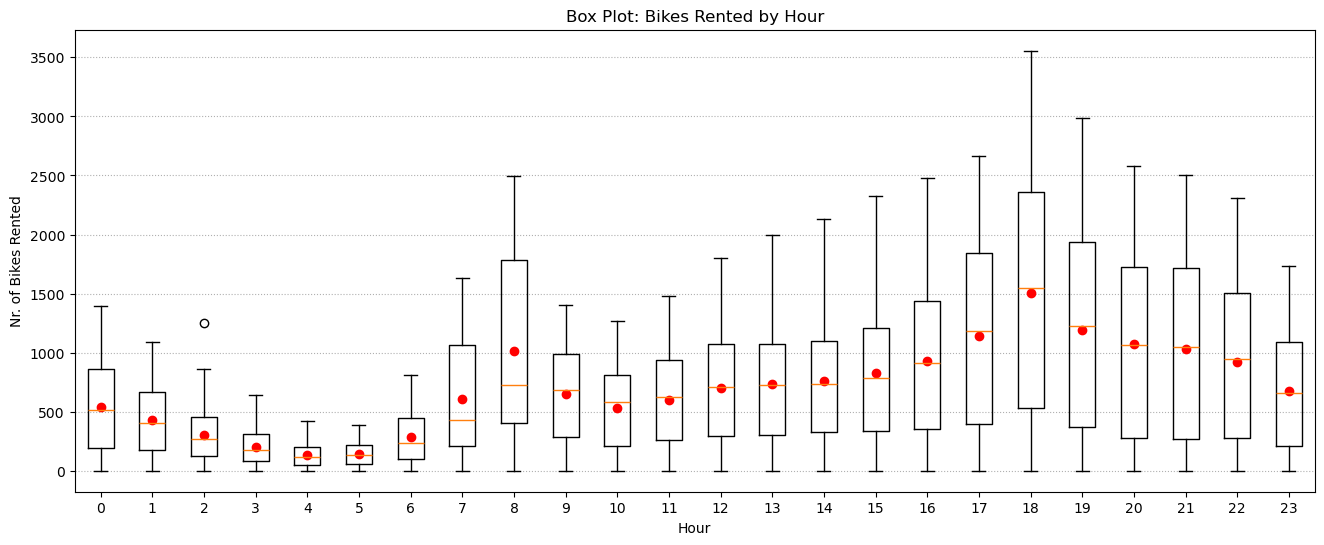

In [51]:
fig, ax = plt.subplots(figsize = (16,6))
bikes_per_hour = [bikes[bikes.Hour == hour]["Rented Bike Count"] for hour in hours]
ax.boxplot(bikes_per_hour, tick_labels = hours)
ax.plot(range(1,25), data_hourwise_mean["Rented Bike Count"], color = "red", marker = 'o', linestyle = "")
ax.set_title("Box Plot: Bikes Rented by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Nr. of Bikes Rented")
ax.grid(axis = "y", linestyle = ":")
fig.savefig(img_dir+"Box_Plot_of_Bikes_Rented_by_Hour.png" , dpi = 400)
plt.show()

### Box Plot of Rented Bikes by Hour

#### **1. Plot Overview**

* This is a **box plot** with red dots overlayed for the **hourly averages**.
* A box plot summarizes the **distribution** of values: the median, quartiles, spread, and potential outliers.
* This visualization helps answer:

  * *How does the distribution of bike rentals vary across hours of the day?*
  * *Are there certain hours with consistently high rentals or more variability?*
  * *What’s the difference between typical and extreme values?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize = (16,6))
```

* Creates the figure and axis.
* `figsize=(16,6)` makes it wide, so all 24 hourly boxes fit clearly.

```python
bikes_per_hour = [bikes[bikes.Hour == hour]["Rented Bike Count"] for hour in hours]
```

* Builds a list of 24 series — each series contains rentals for one specific hour.
* This prepares the data for `boxplot()`.

```python
ax.boxplot(bikes_per_hour, tick_labels = hours)
```

* Draws the **box plot** for each hour.
* `tick_labels=hours` labels the x-axis from 0 to 23.

```python
ax.plot(range(1,25), data_hourwise_mean["Rented Bike Count"], color="red", marker='o', linestyle="")
```

* Plots the **average rentals per hour** as red dots, overlayed on the box plots.
* `range(1,25)` matches the 24 box positions (since boxplot indexing starts at 1).
* `linestyle=""` → no connecting lines, just dots.

```python
ax.set_title("Box Plot: Bikes Rented by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Nr. of Bikes Rented")
```

* Sets the title and axis labels for context.

```python
ax.grid(axis = "y", linestyle = ":")
```

* Adds horizontal dotted gridlines for easier comparison across hours.

```python
fig.savefig(img_dir+"Box_Plot_of_Bikes_Rented_by_Hour.png", dpi = 400)
plt.show()
```

* Saves the chart as a high-resolution image.
* Displays it inline.

---

#### **3. Visual Elements Analysis: Answer the following questions**

Let’s slow down and look at the design.

* What do you notice about how the x-axis is labeled? Do you see all 24 hours clearly spaced?
* How would you describe the combination of box plots (black outlines) and red dots (averages)? Does it help tell the story better than one alone?
* What do you notice about the gridlines? Do they make it easier to compare across hours?

---

#### **4. Data Interpretation: Answer the following questions**

Now let’s focus on the insights from the data.

* Which hours show the widest boxes and whiskers (meaning the most variability in rentals)?
* What do you notice about commuting hours like 8 a.m. and 6 p.m.?
* Are there outliers at certain hours? What might explain those unusual spikes?
* How does the median (orange line inside the box) compare to the average (red dot)? What does that tell you about skewness in the data?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Creating box plots with `ax.boxplot()`.
  * Preparing data per category (list comprehension by hour).
  * Overlaying summary statistics (red averages) on top of distributions.
  * Using gridlines for readability.

* **When this plot is most appropriate:**

  * When you want to show not just averages, but the **spread and shape of the data**.
  * Especially good when variability matters (e.g., peak vs. off-peak rentals).

* **Common student mistakes:**

  * Forgetting that box plot positions start at 1, which can misalign overlayed points.
  * Misinterpreting the box → thinking it shows only the average, instead of quartiles.
  * Leaving out axis labels, which makes the distribution hard to interpret.

* **One suggestion for improvement:**

  * Add a legend or annotation to clarify what the red dots represent (mean values), since the box plot itself already shows the median. That extra clarity helps beginners who might not know the difference.




### Violin Plot of Mean of Rented Bikes by Hour

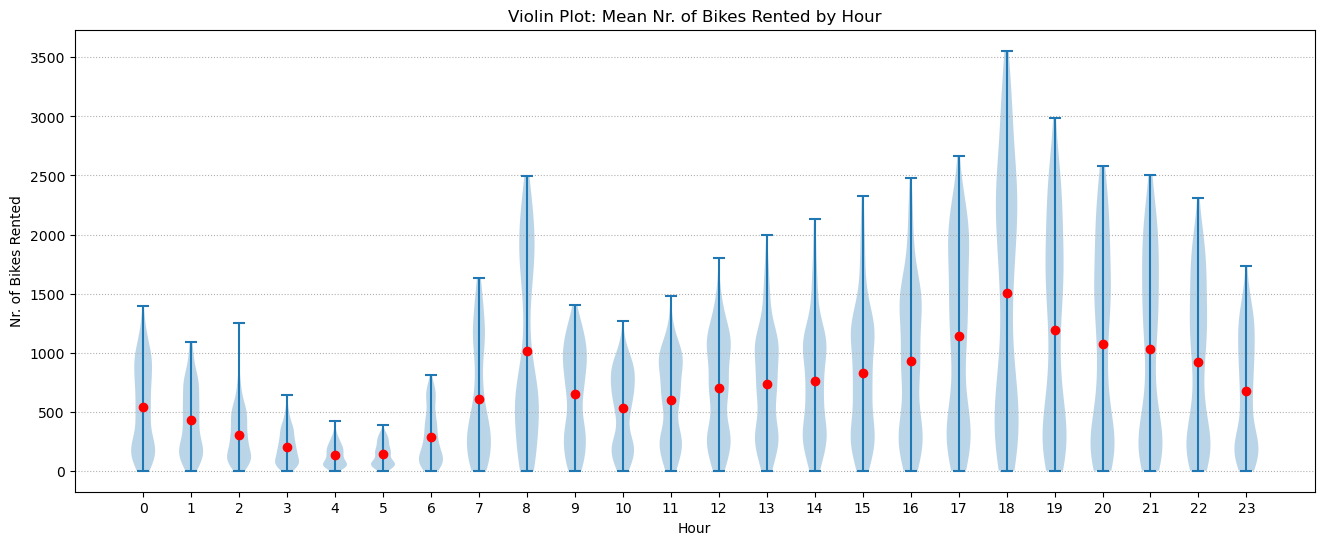

In [52]:
fig, ax = plt.subplots(figsize = (16,6))
bikes_per_hour = [bikes[bikes.Hour == hour]["Rented Bike Count"] for hour in hours]
ax.violinplot(bikes_per_hour)
ax.plot(range(1,25), data_hourwise_mean["Rented Bike Count"], color = "red", marker = 'o', linestyle = "")
ax.set_title("Violin Plot: Mean Nr. of Bikes Rented by Hour")
ax.set_xticks(range(1,25), labels = hours)
ax.set_xlabel("Hour")
ax.set_ylabel("Nr. of Bikes Rented")
ax.grid(axis = "y", linestyle = ":")
fig.savefig(img_dir+"Violin_Plot_of_Bikes_Rented_by_Hour.png" , dpi = 400)
plt.show()

### Violin Plot of Mean of Rented Bikes by Hour

#### **1. Plot Overview**

* This is a **violin plot**, with **red dots overlayed for the average rentals per hour**.
* A violin plot shows the **distribution of data** for each category (here, each hour), using a **smoothed density curve** mirrored on both sides.
* It helps answer questions like:

  * *At what times of day is demand for bikes most variable?*
  * *How are rentals distributed across different hours?*
  * *How does the average compare to the spread of values?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize = (16,6))
```

* Creates the figure and axis.
* `figsize=(16,6)` makes it wide enough to fit 24 violin shapes clearly.

```python
bikes_per_hour = [bikes[bikes.Hour == hour]["Rented Bike Count"] for hour in hours]
```

* Builds a list of 24 arrays — each containing the rentals for a specific hour.
* This provides the input for the violin plot.

```python
ax.violinplot(bikes_per_hour)
```

* Draws the **violin plots** for all hours.
* Each “violin” shows the density (thicker = more common values, thinner = less common).

```python
ax.plot(range(1,25), data_hourwise_mean["Rented Bike Count"], color="red", marker='o', linestyle="")
```

* Overlays **red dots** showing the mean rentals at each hour.
* `range(1,25)` matches violin positions (1–24, since violinplot starts at 1).
* `linestyle=""` → just dots, no connecting line.

```python
ax.set_title("Violin Plot: Mean Nr. of Bikes Rented by Hour")
ax.set_xticks(range(1,25), labels=hours)
ax.set_xlabel("Hour")
ax.set_ylabel("Nr. of Bikes Rented")
```

* Adds the title, x-axis labels (0–23 hours), and y-axis label.

```python
ax.grid(axis="y", linestyle=":")
```

* Adds dotted horizontal gridlines for readability.

```python
fig.savefig(img_dir+"Violin_Plot_of_Bikes_Rented_by_Hour.png", dpi=400)
plt.show()
```

* Saves the plot as a high-resolution PNG.
* Displays it inline.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the **shape of the violins** — where are they wider, and what does that mean?
* How would you describe the contrast between the **blue violins** (distributions) and the **red dots** (averages)?
* How would you describe the role of the **gridlines** here? Do they help you compare across hours?

---

#### **4. Data Interpretation: Answer the following questions**

* Which hours show the tallest violins (largest vertical spread), meaning the rentals vary the most across days?
* At which rental values are the violins widest, meaning most days fall around that level of rentals?
* How do commute hours (around 8 a.m. and 6 p.m.) look compared to the middle of the night?
* Do the red mean dots always line up with the thickest part of the violins? If not, what might that tell us about skewness in the data?
* Are there hours where the distribution seems more consistent (narrower violins), and what could explain that pattern?

---

#### **5. Learning Points**

* **Key Matplotlib concepts:**

  * Creating violin plots with `ax.violinplot()`.
  * Preparing categorical subsets of data for plotting.
  * Overlaying summary statistics on top of a distribution.
  * Using gridlines and labels to improve interpretability.

* **When to use a violin plot:**

  * When you want to show **both the distribution and density** of values, not just summary stats.
  * Especially useful when data may be skewed or multi-peaked.

* **Common student mistakes:**

  * Forgetting that violinplot positions start at 1, which can misalign overlays.
  * Misinterpreting violins — assuming the edges show min/max, when they actually show density curves.
  * Not labeling axes, which leaves the audience confused.

* **One suggestion for improvement:**

  * Add a **legend or annotation** to clarify that blue violins = distributions and red dots = means. For someone new to violin plots, that’s not immediately obvious.


### Scatterplot of Bikes Rented vs. Visibility

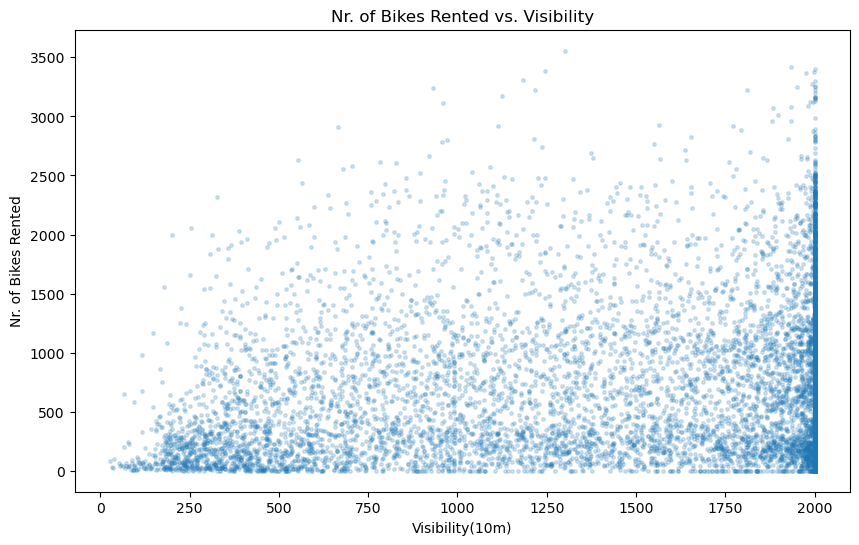

In [53]:
fig, ax = plt.subplots(figsize = (10,6))
cont = ax.plot(bikes["Visibility (10m)"],bikes["Rented Bike Count"], marker = 'o', markersize = 2.5, linestyle = '', alpha = 0.2)
ax.set_title("Nr. of Bikes Rented vs. Visibility")
ax.set_xlabel("Visibility(10m)")
ax.set_ylabel("Nr. of Bikes Rented")
fig.savefig(img_dir+"Scatterplot_of_Bikes_Rented_vs_Visibility.png" , dpi = 400)
plt.show()

### Scatterplot of Bikes Rented vs. Visibility
#### **1. Plot Overview**

* This is a **scatter plot**. Each dot represents one observation: the number of bikes rented at a given level of visibility.
* It’s designed to show the relationship between two continuous variables: visibility (x-axis) and bikes rented (y-axis).
* It helps answer questions like:

  * *Does visibility (how clear the weather is) affect bike rental numbers?*
  * *Are more bikes rented when visibility is high compared to when it’s low?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize = (10,6))
```

* Creates a figure (`fig`) and a set of axes (`ax`) to draw the plot.
* `figsize=(10,6)` makes the chart a comfortable size.

```python
cont = ax.plot(bikes["Visibility (10m)"], bikes["Rented Bike Count"],
               marker = 'o', markersize = 2.5, linestyle = '', alpha = 0.2)
```

* Plots the scatter points:

  * `bikes["Visibility (10m)"]` → x-values.
  * `bikes["Rented Bike Count"]` → y-values.
* `marker='o'` → circular dots.
* `markersize=2.5` → makes them small, since there are many points.
* `linestyle=''` → ensures no connecting lines (otherwise Matplotlib tries to draw a line).
* `alpha=0.2` → makes points semi-transparent, so areas with many overlapping dots look darker.

```python
ax.set_title("Nr. of Bikes Rented vs. Visibility")
ax.set_xlabel("Visibility(10m)")
ax.set_ylabel("Nr. of Bikes Rented")
```

* Sets a clear title and axis labels so the viewer knows what’s being compared.

```python
fig.savefig(img_dir+"Scatterplot_of_Bikes_Rented_vs_Visibility.png", dpi = 400)
plt.show()
```

* Saves the figure at high resolution (400 dpi, nice for reports).
* Displays the plot.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the x-axis — how is visibility scaled, and what’s the maximum?
* How would you describe the color and transparency of the dots? Does alpha blending help reveal dense clusters?
* Do you see any trend line or legend in the plot? Would adding one make interpretation easier?

---

#### **4. Data Interpretation: Answer the following questions**

* Do you see any general trend between visibility and bike rentals? Does higher visibility clearly mean more rentals, or is the relationship weak?
* Are there clusters of points (for example, lots of rentals when visibility is near 2000 m)?
* Do you notice any outliers — unusually high numbers of rentals compared to the rest?
* How effective is this scatter plot at showing the relationship? Could another visualization (like a regression line or smoothing curve) help make the trend clearer?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Using `ax.plot()` for scatter-style plots (by turning off lines with `linestyle=''`).
  * Adjusting marker size and transparency to handle dense data.
  * Labeling axes and titles for clarity.
* **When to use a scatter plot:**

  * When you want to explore relationships between two numeric variables.
  * Particularly useful for spotting clusters, correlations, or outliers.
* **Common student mistakes:**

  * Forgetting `alpha`, which makes dense scatterplots unreadable.
  * Using markers that are too large, which leads to overplotting.
  * Not labeling axes, so the audience has no idea what the dots represent.
* **One suggestion for improvement:**

  * Add a **trend line** (for example, with regression or smoothing) to show whether visibility and rentals have a correlation. Without it, the viewer may struggle to interpret the cloud of points.


### Scatterplot of Bikes Rented vs. Solar Radiation

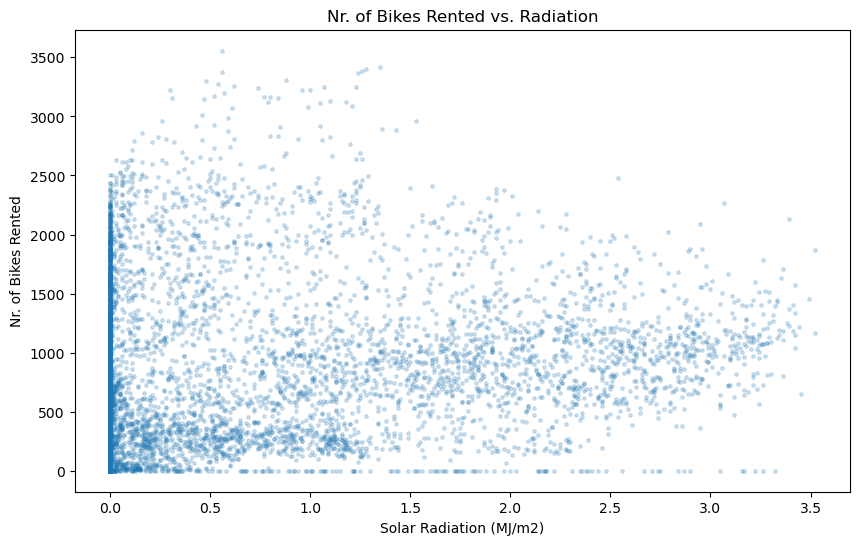

In [54]:
fig, ax = plt.subplots(figsize = (10,6))
cont = ax.plot(bikes["Solar Radiation (MJ/m2)"],bikes["Rented Bike Count"], marker = 'o', markersize = 2.5, linestyle = '', alpha = 0.2)
ax.set_title("Nr. of Bikes Rented vs. Radiation")
ax.set_xlabel("Solar Radiation (MJ/m2)")
ax.set_ylabel("Nr. of Bikes Rented")
fig.savefig(img_dir+"Scatterplot_of_Bikes_Rented_vs_Radiation.png" , dpi = 400)
plt.show()

In [55]:
data_hourwise_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        24 non-null     float64
 1   Visibility (10m)         24 non-null     float64
 2   Solar Radiation (MJ/m2)  24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes


### 19. Add second subplot—a line plot with a fill_between plot.

- This should occupy row 1 and columns 0 and 1 of the grid.
- This plot is a line plot along with a fill_between() plot. Use Hours on the x-axis and solar on the y-axis,
- Fill_between() plot can use the standard deviation of the solar radiation values as the fill_between region. You can use NumPy’s std() function to compute standard deviation of the solar variable.
- Add x-axis and y-axis labels and title to this subplot.

### Stem Plot of Mean Visibility by Hour

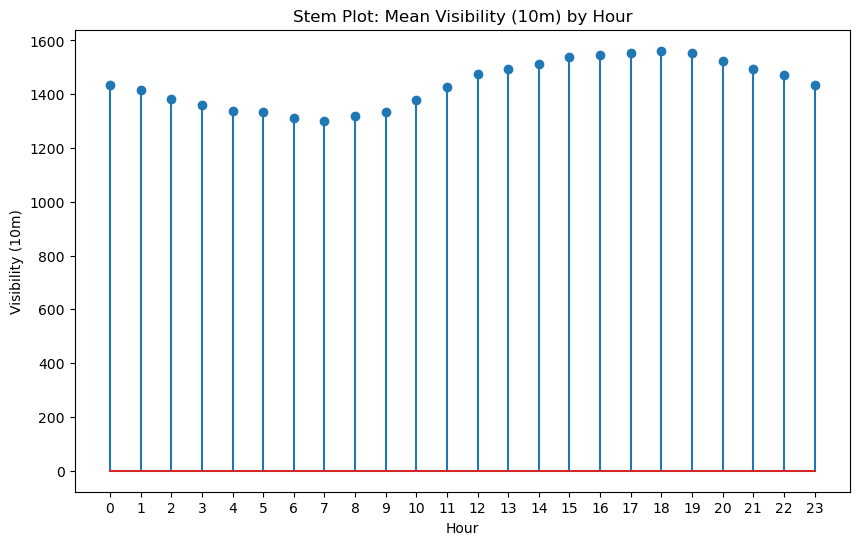

In [56]:
fig, ax = plt.subplots(figsize = (10,6))
ax.stem(data_hourwise_mean.index, data_hourwise_mean["Visibility (10m)"])
ax.set_title("Stem Plot: Mean Visibility (10m) by Hour")
ax.set_xticks(data_hourwise_mean.index)
ax.set_xlabel("Hour")
ax.set_ylabel("Visibility (10m)")
plt.show()

In [57]:
solar_radiation_group = bikes[["Hour","Solar Radiation (MJ/m2)"]].groupby("Hour")
solar = solar_radiation_group.min()
solar.columns = ["min"]
solar["mean"] = solar_radiation_group.mean()
solar["max"] = solar_radiation_group.max()
solar["std"] = solar_radiation_group.std()
solar["lower"] = solar["mean"] - solar["std"]
solar["upper"] = solar["mean"] + solar["std"]
solar

,min,mean,max,std,lower,upper
Hour,,,,,,
0,0.0,0.000000,0.00,0.000000,0.000000,0.000000
1,0.0,0.000000,0.00,0.000000,0.000000,0.000000
2,0.0,0.000000,0.00,0.000000,0.000000,0.000000
3,0.0,0.000000,0.00,0.000000,0.000000,0.000000
4,0.0,0.000000,0.00,0.000000,0.000000,0.000000
5,0.0,0.000000,0.00,0.000000,0.000000,0.000000
6,0.0,0.006384,0.08,0.014716,-0.008332,0.021099
7,0.0,0.093973,0.56,0.140489,-0.046517,0.234462
8,0.0,0.354959,1.33,0.379498,-0.024539,0.734457


#### Code Breakdown
```python
solar_radiation_group = bikes[["Hour","Solar Radiation (MJ/m2)"]].groupby("Hour")
```

* Groups the data by **hour of the day**. This prepares it for summaries like mean, min, max, etc.

```python
solar = solar_radiation_group.min()
solar.columns = ["min"]
solar["mean"] = solar_radiation_group.mean()
solar["max"] = solar_radiation_group.max()
solar["std"] = solar_radiation_group.std()
solar["lower"] = solar["mean"] - solar["std"]
solar["upper"] = solar["mean"] + solar["std"]
```

* Creates a summary DataFrame with statistics for each hour: min, mean, max, standard deviation, and mean ± std (to define the shaded band).


### Solar Radiation

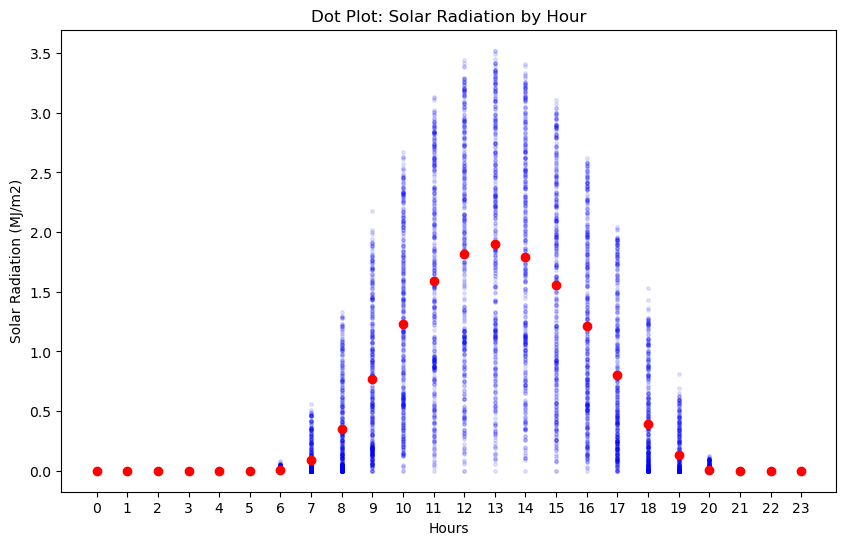

In [58]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(bikes["Hour"], bikes["Solar Radiation (MJ/m2)"], 
        color = 'blue', marker = 'o', markersize = 2.5, linestyle='', alpha = 0.1)
ax.plot(range(0,24), data_hourwise_mean["Solar Radiation (MJ/m2)"], color = "red", marker = 'o', linestyle = "")
ax.set_title("Dot Plot: Solar Radiation by Hour")
ax.set_xticks(hours)
ax.set_xlabel("Hours")
ax.set_ylabel("Solar Radiation (MJ/m2)")
fig.savefig(img_dir+"Dot_Plot_Solar_Radiation.png" , dpi = 400)
plt.show()

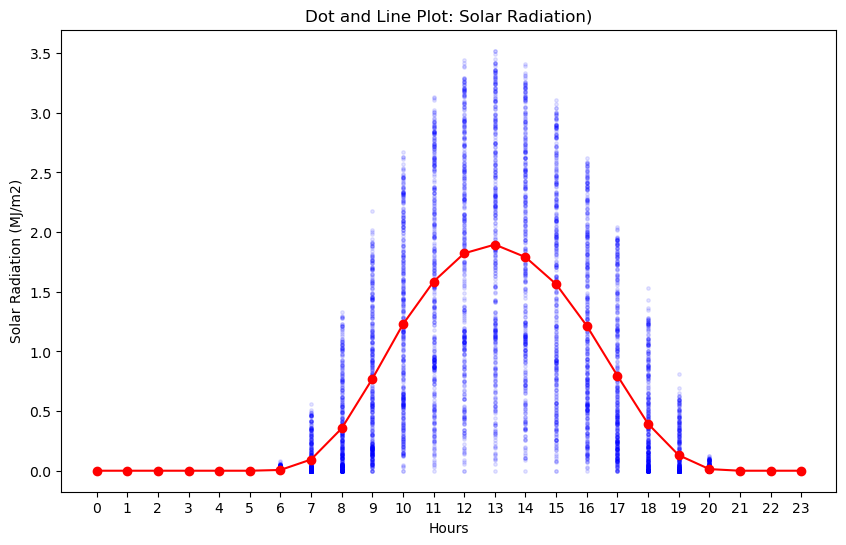

In [59]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(bikes["Hour"], bikes["Solar Radiation (MJ/m2)"], 
        color = 'blue', marker = 'o', markersize = 2.5, linestyle='', alpha = 0.1)
ax.plot(range(0,24), solar["mean"], color = "red", marker = 'o', linestyle = "-")
ax.set_title("Dot and Line Plot: Solar Radiation)")
ax.set_xticks(hours)
ax.set_xlabel("Hours")
ax.set_ylabel("Solar Radiation (MJ/m2)")
fig.savefig(img_dir+"Dot_Plot_Solar_Radiation_with_Mean_Curve.png" , dpi = 400)
plt.show()

### Solar Radiation Across the Day

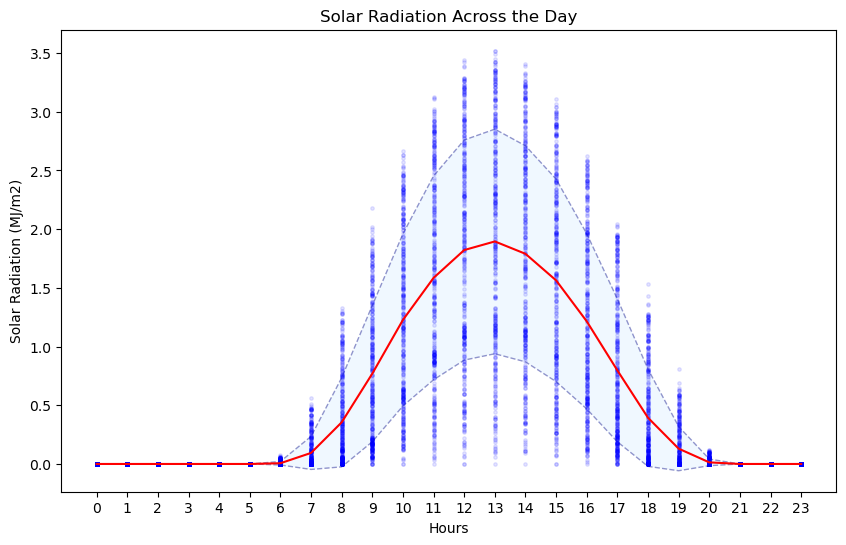

In [60]:

fig, ax = plt.subplots(figsize = (10,6))
ax.fill_between(solar.index, solar["lower"], solar["upper"],facecolor='#F0F8FF', 
                alpha=1.0, edgecolor='#8F94CC', linewidth=1, linestyle='dashed')
ax.plot(bikes["Hour"], bikes["Solar Radiation (MJ/m2)"], 
        color = 'blue', marker = 'o', markersize = 2.5, linestyle='', alpha = 0.1)
ax.plot(solar.index, solar["mean"], 'r-')
ax.set_title("Solar Radiation Across the Day")
ax.set_xticks(hours)
ax.set_xlabel("Hours")
ax.set_ylabel("Solar Radiation (MJ/m2)")
fig.savefig(img_dir+"Dot_Plot_Solar_Radiation_with_Fill_Between.png" , dpi = 400)
plt.show()

### Solar Radiation Across the Day


#### **1. Plot Overview**

* This is a **layered plot** that combines:

  * **Dots (scatter)** for the raw solar radiation values,
  * A **red line** for the hourly average, and
  * A **shaded band** representing variability (mean ± standard deviation).
* It’s designed to show not only the average solar radiation across hours of the day, but also how much it varies from day to day.
* It helps answer questions like:

  * *At what times of day is solar radiation highest?*
  * *How consistent is sunlight at those times?*
  * *When is radiation nearly zero (nighttime)?*

---

#### **2. Code Breakdown**


```python
fig, ax = plt.subplots(figsize = (10,6))
```

* Creates the figure and axes. The 10×6 size makes it readable.

```python
ax.fill_between(solar.index, solar["lower"], solar["upper"],
                facecolor='#F0F8FF', alpha=1.0,
                edgecolor='#8F94CC', linewidth=1, linestyle='dashed')
```

* Shades the area between “lower” and “upper” (mean ± std).
* `facecolor='#F0F8FF'` → pale blue fill.
* `edgecolor='#8F94CC', linestyle='dashed'` → dashed outline for emphasis.

```python
ax.plot(bikes["Hour"], bikes["Solar Radiation (MJ/m2)"], 
        color='blue', marker='o', markersize=2.5, linestyle='', alpha=0.1)
```

* Plots raw data as semi-transparent blue dots.
* Small markers and `alpha=0.1` prevent overcrowding.

```python
ax.plot(solar.index, solar["mean"], 'r-')
```

* Plots the red mean line across hours.

```python
ax.set_title("Dot, Line and Fill Between Plot: Solar Radiation)")
ax.set_xticks(hours)
ax.set_xlabel("Hours")
ax.set_ylabel("Solar Radiation (MJ/m2)")
```

* Adds the title, labels, and ticks for hours 0–23.

```python
fig.savefig(img_dir+"Dot_Plot_Solar_Radiation_with_Fill_Between.png", dpi = 400)
plt.show()
```

* Saves a sharp version (400 dpi) and displays it.

---

#### **3. Visual Elements Analysis : Answer these Questions**

* What do you notice about the shape of the red line — does it look like a solar cycle?
* How would you describe the blue shaded band — does it stay narrow in the morning/evening and widen at midday?
* What do you notice about the scatter dots — do they cluster tightly at some hours, or spread out widely?

---

#### **4. Data Interpretation : Answer these Questions**

* At what hours is **solar radiation close to zero**, and why?
* Around what time does the **red mean line peak**, and how high does it go?
* Is the shaded band **wider around noon**, and what does that tell us about variability in sunshine during midday?
* Do you see any **dots outside the shaded band** — what might those outliers represent (e.g., unusual weather)?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Grouping data with pandas and calculating summary stats.
  * Using `fill_between()` to show variability (mean ± std).
  * Overlaying scatter, line, and shaded ranges for a multi-layered visualization.
* **When this plot is most appropriate:**

  * When you want to show both raw values and summaries, while also communicating variability/uncertainty.
  * Perfect for environmental or time-of-day patterns.
* **Common student mistakes:**

  * Forgetting transparency (`alpha`), leading to unreadable scatter clouds.
  * Misinterpreting the shaded band as min–max rather than mean ± std.
  * Skipping axis labels, leaving the audience guessing.
* **One suggestion for improvement:**

  * Add a **legend** clarifying:

    * Blue dots = raw data,
    * Red line = mean,
    * Shaded area = variability (mean ± std).
      That way, even someone new to the dataset can instantly read the story.

### Fill Between Plot of Solar Radiation

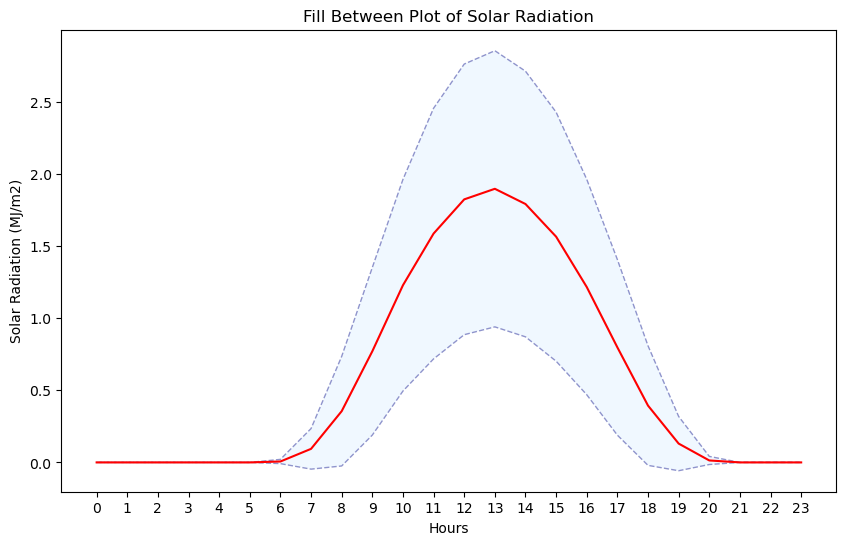

In [61]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(solar.index, solar["mean"], 'r-')

ax.fill_between(solar.index, solar["lower"], solar["upper"], facecolor='#F0F8FF', 
                alpha=1.0, edgecolor='#8F94CC', linewidth=1, linestyle='dashed')

ax.set_title("Fill Between Plot of Solar Radiation")
ax.set_xticks(hours)
ax.set_xlabel("Hours")
ax.set_ylabel("Solar Radiation (MJ/m2)")

plt.show()

In [62]:
solar[["mean","std","lower","upper"]].round(2).loc[6:14]

,mean,std,lower,upper
Hour,,,,
6,0.01,0.01,-0.01,0.02
7,0.09,0.14,-0.05,0.23
8,0.35,0.38,-0.02,0.73
9,0.77,0.58,0.19,1.35
10,1.23,0.73,0.49,1.96
11,1.59,0.87,0.72,2.45
12,1.82,0.94,0.88,2.76
13,1.90,0.96,0.94,2.85
14,1.79,0.92,0.87,2.71


### 12. Add a third subplot, a box plot, to the grid.
- This box plot shows the statistical properties of the bikes variable. 
- This should span to row 0 and 1 and column 2. 
- Remember, in Steps 18 and 19 the subplots plot did not occupy column 2.  
- Add x-axis and y-axis labels and title to this subplot. 

### Distribution of Bikes Rented as Histogram and Boxplot

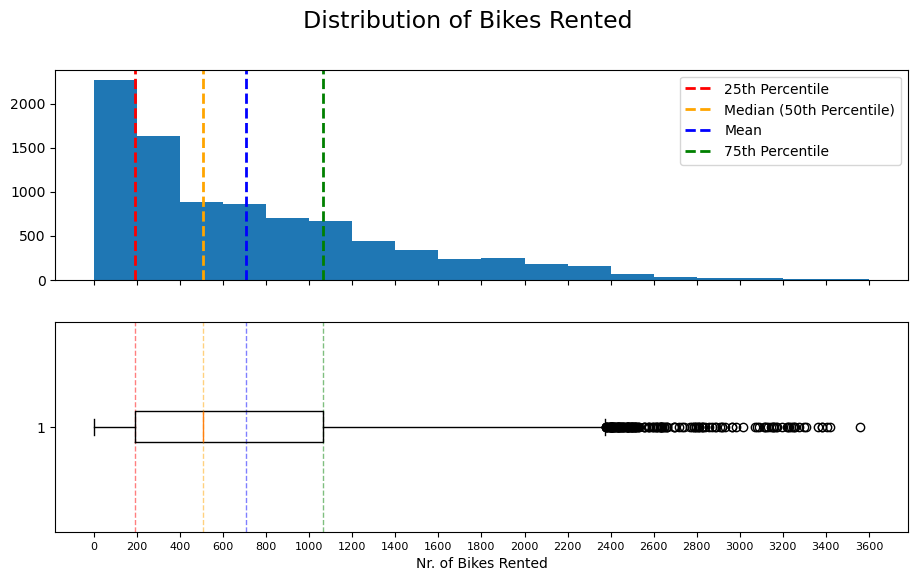

In [63]:
fig, (ax0, ax1) = plt.subplots(figsize = (11,6), ncols = 1, nrows = 2, sharex = True)
num_bikes = bikes["Rented Bike Count"]
fig.suptitle('Distribution of Bikes Rented', fontsize = 17)
ax0.hist(num_bikes, bins = range(0,3800,200))
perc_25 = np.percentile(num_bikes, 25)
perc_50 = np.percentile(num_bikes, 50)
perc_75 = np.percentile(num_bikes, 75)
bikes_mean = np.mean(num_bikes)
ax0.axvline(perc_25, color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
ax0.axvline(perc_50, color='orange', linestyle='dashed', linewidth=2, label='Median (50th Percentile)')
ax0.axvline(bikes_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
ax0.axvline(perc_75, color='green', linestyle='dashed', linewidth=2, label='75th Percentile')
ax0.legend()
ax1.axvline(perc_25, color='red', linestyle='dashed', linewidth=1, label='25th Percentile', alpha = 0.5)
ax1.axvline(perc_50, color='orange', linestyle='dashed', linewidth=1, label='Median (50th Percentile)', alpha = 0.5)
ax1.axvline(bikes_mean, color='blue', linestyle='dashed', linewidth=1, label='Mean', alpha = 0.5)
ax1.axvline(perc_75, color='green', linestyle='dashed', linewidth=1, label='75th Percentile', alpha = 0.5)
ax1.boxplot(num_bikes, vert = False)
ax1.set_xticks(range(0,3800,200))
ax1.set_xticklabels(range(0,3800,200), fontsize =8)
ax1.set_xlabel("Nr. of Bikes Rented")
fig.savefig(img_dir+"Distribution_of_Bikes_Rented.png" , dpi = 400)
plt.show()

### Distribution of Bikes Rented as Histogram and Boxplot

#### **1. Plot Overview**

* This figure uses **two plots stacked vertically**:

  * A **histogram** (top) that shows the distribution of bike rentals.
  * A **box plot** (bottom) that summarizes the same data with quartiles, median, and outliers.
* Vertical dashed lines mark the **25th percentile, median (50th percentile), mean, and 75th percentile**.
* It’s designed to answer:

  * *How are bike rentals distributed?*
  * *What’s the typical range of rentals?*
  * *Are there outliers or unusually high rental values?*

---

#### **2. Code Breakdown**

```python
fig, (ax0, ax1) = plt.subplots(figsize=(11,6), ncols=1, nrows=2, sharex=True)
```

* Creates a figure with two subplots stacked vertically.
* `sharex=True` makes both plots use the same x-axis.

```python
num_bikes = bikes["Rented Bike Count"]
```

* Selects the column with the number of bikes rented.

```python
fig.suptitle('Distribution of Bikes Rented', fontsize=17)
```

* Adds a big title across the entire figure.

```python
ax0.hist(num_bikes, bins=range(0,3800,200))
```

* Creates the histogram (top panel) with bins of width 200 rentals.

```python
perc_25 = np.percentile(num_bikes, 25)
perc_50 = np.percentile(num_bikes, 50)
perc_75 = np.percentile(num_bikes, 75)
bikes_mean = np.mean(num_bikes)
```

* Calculates summary statistics: quartiles and mean.

```python
ax0.axvline(...); ax1.axvline(...)
```

* Draws vertical dashed lines at these statistics, in both the histogram and the box plot.
* Different colors identify different lines (red = 25th percentile, orange = median, blue = mean, green = 75th percentile).
* Alpha in the bottom plot makes them lighter so they don’t overwhelm the box.

```python
ax0.legend()
```

* Adds a legend to the histogram so viewers know what each line means.

```python
ax1.boxplot(num_bikes, vert=False)
```

* Draws the box plot horizontally (easy to align with the histogram’s x-axis).

```python
ax1.set_xticks(range(0,3800,200))
ax1.set_xticklabels(range(0,3800,200), fontsize=8)
ax1.set_xlabel("Nr. of Bikes Rented")
```

* Sets tick marks and labels for the x-axis, plus the axis label.

```python
fig.savefig(..., dpi=400); plt.show()
```

* Saves and displays the plot.

---

#### **3. Visual Elements Analysis : Answer these Questions**

* What do you notice about the histogram shape — is it symmetric or skewed?
* What do you notice about the box plot whiskers and outliers — are there many values far from the main range?
* How does the legend in the histogram help make the chart self-explanatory?

---

#### **4. Data Interpretation : Answer these Questions**

* Does the histogram show a long tail to the right? What does that mean about days with unusually high rentals?
* How does the mean (blue line) compare with the median (orange line)? Which way is the data skewed?
* Looking at the box plot, where do you see outliers, and what might they represent (holidays, special events)?
* What do the 25th and 75th percentile lines tell you about the middle 50% of the data?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Combining multiple subplots into one figure (`nrows=2`).
  * Adding summary lines with `axvline()`.
  * Showing distribution (histogram) alongside summary (box plot).
* **When this is most appropriate:**

  * When you want to **compare detailed distribution shape with summary statistics**.
  * Great for teaching — you see both the raw spread and the statistical summary at once.
* **Common student mistakes:**

  * Forgetting to align scales between the histogram and box plot.
  * Using too few bins in the histogram, which hides detail.
  * Not labeling the vertical lines, leaving the viewer guessing.

### Box Plot of Bikes Rented

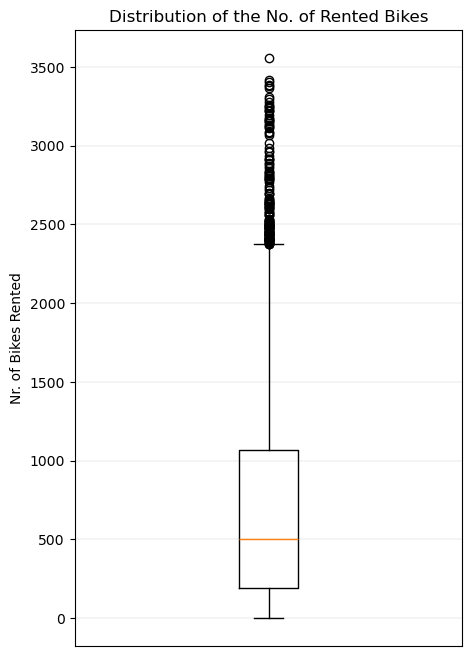

In [64]:
fig, ax = plt.subplots(figsize = (5,8))

ax.boxplot(bikes["Rented Bike Count"])

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_ylabel('Nr. of Bikes Rented')
ax.set_xlabel('') 
ax.set_xticks([])
ax.set_title("Distribution of the No. of Rented Bikes")
plt.show()

In [65]:
bikes[["Rented Bike Count"]].describe().round(0).astype(int)

,Rented Bike Count
count,8760
mean,705
std,645
min,0
25%,191
50%,504
75%,1065
max,3556


### Grid with three subplots

In [66]:
import matplotlib.gridspec as GridSpec

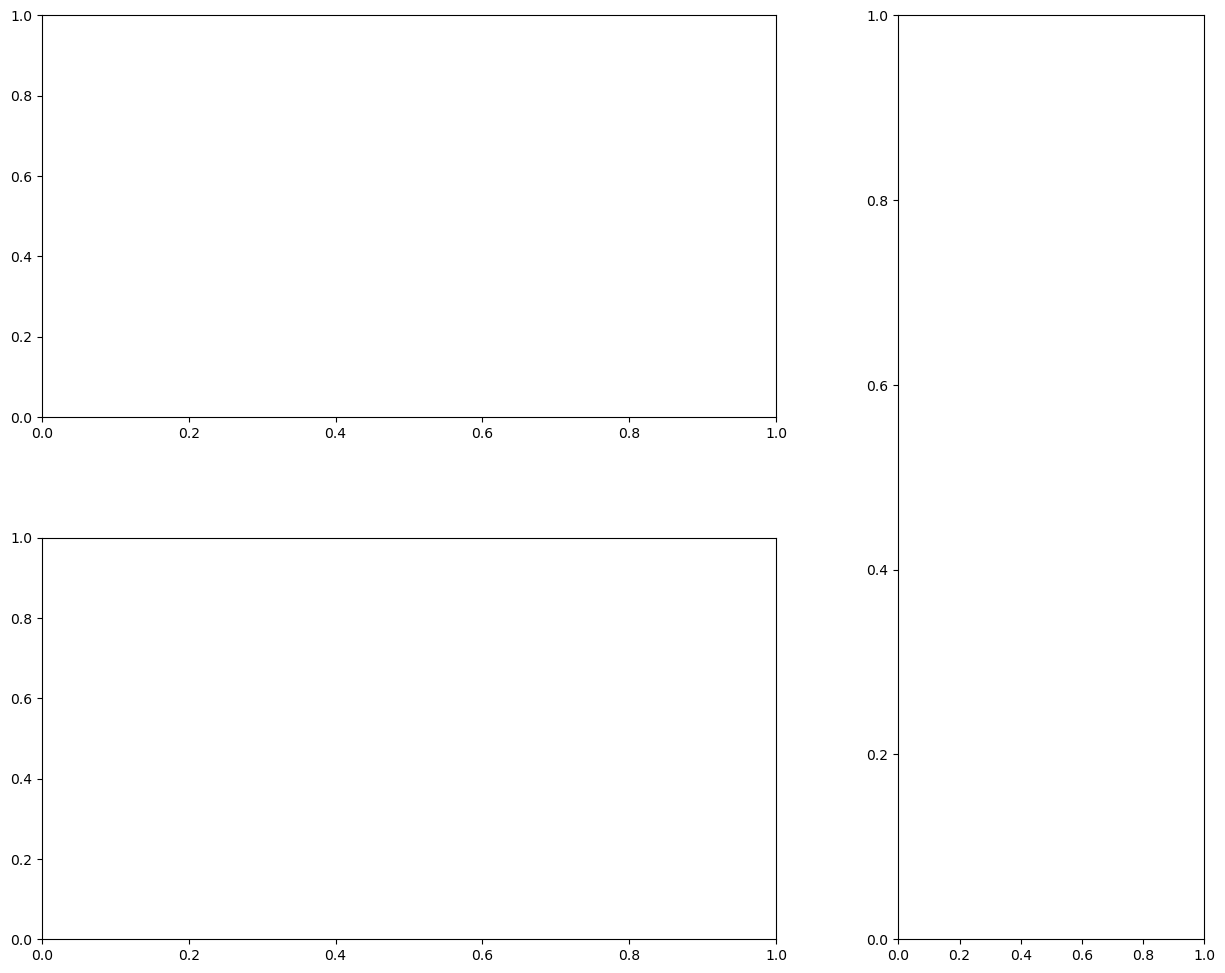

In [67]:
fig = plt.figure(figsize = (15,12))
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)
plt.subplot(grid[0,0:2])
plt.subplot(grid[1,0:2])
plt.subplot(grid[:,2])
plt.show()

### Patterns in Bike Rentals and Weather Factors

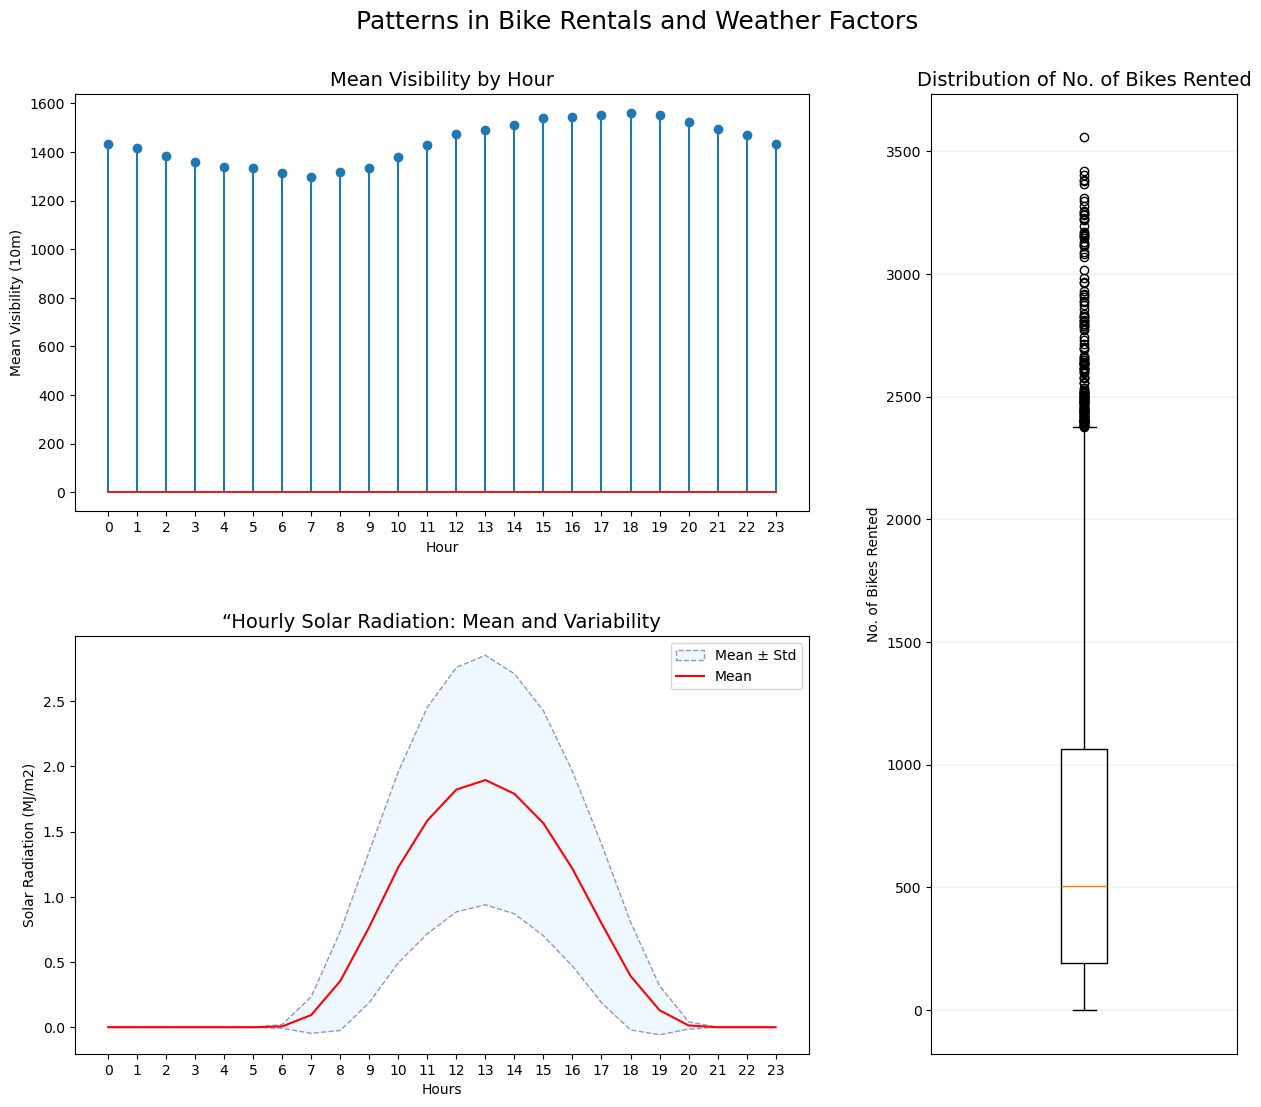

In [68]:
fig = plt.figure(figsize = (15,12))

grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)

fig.suptitle('Patterns in Bike Rentals and Weather Factors', fontsize = 18)

stem_plot = plt.subplot(grid[0,0:2])
stem_plot.stem(data_hourwise_mean.index, data_hourwise_mean["Visibility (10m)"])
stem_plot.set_title("Mean Visibility by Hour" , fontsize = 14)
stem_plot.set_xticks(data_hourwise_mean.index)
stem_plot.set_xlabel("Hour")
stem_plot.set_ylabel("Mean Visibility (10m)")

line_plot = plt.subplot(grid[1,0:2])
line_plot.fill_between(solar.index, solar["lower"], solar["upper"],
    facecolor='#F0F8FF', alpha=1.0, edgecolor='#8F94CC', linewidth=1, linestyle='dashed', label='Mean ± Std')
line_plot.plot(solar.index, solar["mean"], 'r-', label='Mean')
line_plot.set_title("“Hourly Solar Radiation: Mean and Variability", fontsize = 14)
line_plot.set_xticks(solar.index)
line_plot.set_xlabel("Hours")
line_plot.set_ylabel("Solar Radiation (MJ/m2)")
line_plot.legend(loc='upper right')

box_plot = plt.subplot(grid[:,2])
box_plot.boxplot(bikes["Rented Bike Count"])
box_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
box_plot.set_title("Distribution of No. of Bikes Rented", fontsize = 14)
box_plot.set_xlabel('') 
box_plot.set_ylabel('No. of Bikes Rented')
box_plot.set_xticks([])

fig.subplots_adjust(top=0.91)
fig.savefig(img_dir+"Patterns_in_Bike_Rentals_and_Weather_Factors.png" , dpi = 400)
plt.show()

### Analysis of Bikes Data

#### **1. Plot Overview**

* This is a **dashboard-style figure** built with three subplots arranged in a grid:

  * **Top-left:** A **stem plot** showing how mean visibility changes by hour of the day.
  * **Bottom-left:** A **line + fill plot** showing average solar radiation by hour, with a shaded band for variability (mean ± standard deviation).
  * **Right side:** A **box plot** showing the distribution of the number of bikes rented.
* It’s designed to give a **broad overview** of the dataset, showing both environmental conditions (visibility, solar radiation) and usage (bike rentals).
* It helps answer questions like:

  * *When is visibility highest or lowest across the day?*
  * *What is the daily pattern of solar radiation, and how much does it vary?*
  * *What’s the typical number of bikes rented, and are there outliers?*

---

#### **2. Code Breakdown**

```python
fig = plt.figure(figsize = (15,12))
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)
fig.suptitle('Analysis of Bikes Data', fontsize = 18)
```

* Creates a large canvas (15×12 inches) and arranges it into a 2×3 grid of cells.
* `wspace` and `hspace` control subplot spacing.
* `suptitle` adds a main title across the whole figure.

**Stem plot (top-left):**

```python
stem_plot = plt.subplot(grid[0,0:2])
stem_plot.stem(data_hourwise_mean.index, data_hourwise_mean["Visibility (10m)"])
```

* Plots visibility values as vertical “sticks” with dots at the ends.

```python
stem_plot.set_title("Mean Visibility by Hour", fontsize = 14)
stem_plot.set_xticks(data_hourwise_mean.index)
stem_plot.set_xlabel("Hour")
stem_plot.set_ylabel("Mean Visibility (10m)")
```

* Adds labels and ensures all hours (0–23) appear on the x-axis.

**Line + fill plot (bottom-left):**

```python
line_plot = plt.subplot(grid[1,0:2])
line_plot.fill_between(solar.index, solar["lower"], solar["upper"],
    facecolor='#F0F8FF', alpha=1.0, edgecolor='#8F94CC',
    linewidth=1, linestyle='dashed', label='Mean ± Std')
line_plot.plot(solar.index, solar["mean"], 'r-', label='Mean')
```

* Shades the range between mean ± standard deviation.
* Overlays a solid red line for the mean.
* Labels both for the legend.

```python
line_plot.set_title("Solar Radiation by Hour", fontsize = 14)
line_plot.set_xticks(solar.index)
line_plot.set_xlabel("Hours")
line_plot.set_ylabel("Solar Radiation (MJ/m2)")
line_plot.legend(loc='upper right')
```

* Adds titles, labels, and a legend to explain the red line and shaded band.

**Box plot (right side):**

```python
box_plot = plt.subplot(grid[:,2])
box_plot.boxplot(bikes["Rented Bike Count"])
```

* Creates a vertical box plot summarizing bike rentals.

```python
box_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
box_plot.set_title("Distribution of No. of Bikes Rented", fontsize = 14)
box_plot.set_xlabel('')
box_plot.set_ylabel('No. of Bikes Rented')
box_plot.set_xticks([])
```

* Adds y-gridlines for readability.
* Removes the misleading “1” on the x-axis.
* Labels the y-axis correctly to show rental counts.

---

#### **3. Visual Elements Analysis : Answer these Questions**

* How would you describe the color scheme — does the red mean line stand out against the pale blue fill?
* What do you notice about the legend in the solar radiation plot — does it make the layers clearer?

---

#### **4. Data Interpretation : Answer these Questions**

* Looking at the stem plot, when is visibility lowest? Is there a clear daily pattern?
* In the solar radiation plot, around what hour is the peak radiation, and is the variability wide or narrow there?
* In the box plot, what do you notice about the spread of rentals — are there many outliers? Where is the median relative to the mean?
* Taken together, do you see a link between environmental conditions (visibility, radiation) and bike rentals?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Using `GridSpec` for flexible subplot layouts.
  * Combining multiple plot types (stem, line+fill, box) into a single figure.
  * Adding legends to clarify layers.
  * Cleaning up axes (removing the “1” tick on the box plot).
* **When this plot type is most appropriate:**

  * For creating summary dashboards that give an overview of multiple aspects of a dataset.
  * Perfect for reports, where you want readers to see different angles at once.
* **Common student mistakes:**

  * Forgetting to add legends when combining line + fill plots.
  * Overcrowding plots with too many subplots or poor spacing.